# A verdade sobre a missão Apollo 17

Após o vazamento de mais um conjunto de imagens secretamente guardadas pela agência conspiratória de aeronáutica nacional e administração espacial (conhecida como NASA), pesquisadores que não seguem metodologia científica/marxista, mas sim a sua intuição, conseguiram descobrir a origem de alguns fenômenos sendo vivenciados inclusive no Brasil. A evidência está completamente contida nesta foto:

![Foto de um astronauta na lua, com um disco voador abduzindo um porco e uma latinha de pepsi pisada no chão](what-rly-happened-on-the-moon.png)

Veja as conclusões dos pesquisadores e o passo a passo para chegarem nelas:

1. O avistamento de UFOs também acontece na lua e é encobertado pela NASA
1. Em vez de vacas, na lua, os UFOs têm predileção por porcos
1. O astronauta [Gene Cernan][gene] quebrou os protocolos e conversou com o morador da lua
1. Gene Cernan aceitou a oferta do alien e ingeriu [líquido adoçado por fetos humanos][fetos]
1. Sob os efeitos alucinógenos do líquido, Gene Cernan:
   1. Pediu a um alienígena que tirasse essa foto dele
   1. Fez amizade com o alien e o trouxe para a ~~America~~Terra
1. Na Terra, o alien foi deixado na América, gerou prole e hoje é presidente do Brasil

[gene]: https://metro.co.uk/2017/01/16/gene-cernan-the-last-astronaut-to-walk-on-the-moon-dies-aged-82-6385153/
[fetos]: https://www.youtube.com/watch?v=1QShqmm1uKU

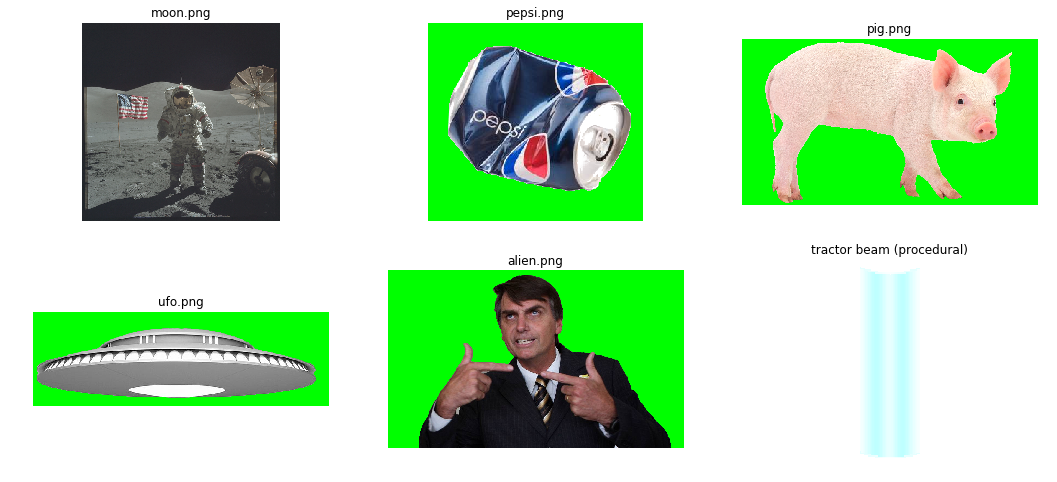

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import skimage
import skimage.io as io
import math

%matplotlib inline


def display_images(images, lines, columns):
    # cria uma figura com espaço todas as imagens
    figure, axes = plt.subplots(lines, columns, figsize=(18, 8))

    axes = axes.ravel()
    
    # coloca a imagem em seu subplot
    slots = lines * columns
    while slots > 0:
        i = lines * columns - slots
        slots -= 1
        ax = axes[i]
        ax.set_axis_off()
        if i < len(images):
            ax.set_title(images[i][0])
            ax.imshow(images[i][1])
        ax.plot()

    plt.show()
    

def generate_tractor_beam(size, color_stops, bulged=True):
    '''
    Geração procedural do raio trator. Cria uma gradiente com um número de 
    "color stops" >= 2 e faz uma interpolação gaussiana entre os pares de pontos.
    
    Depois de criar a imagem com o gradiente, também aplica uma transformação
    para abaulá-la (bulge_down), tirando um pedacinho de cima e colocando um abaixo
    '''
    # valor gaussiano de x
    def gaussian(x, a, b, c, d=0):
        return a * math.exp(-(x - b)**2 / (2 * c**2)) + d
    
    # cor do pixel j
    def pixel(j, length, map):
        length = float(length)
        r = sum([gaussian(j, p[1][0], p[0] * length, length/(len(map))) for p in map])
        g = sum([gaussian(j, p[1][1], p[0] * length, length/(len(map))) for p in map])
        b = sum([gaussian(j, p[1][2], p[0] * length, length/(len(map))) for p in map])
        a = sum([gaussian(j, p[1][3], p[0] * length, length/(len(map))) for p in map])
        return min(1.0, r), min(1.0, g), min(1.0, b), min(1.0, a)
    
    # abaula a imagem, tirando um semicírculo do alto e colocando-o
    # em baixo (usando transparência)
    def bulge_down(image, radius, distance):
        '''
        radius: raio do círculo
        distance: distância do centro do círculo até o topo
        '''
        circle_top_center = (-distance, image.shape[1]/2)
        circle_bottom_center = (image.shape[0]-radius, image.shape[1]/2)
        
        def distance_to_circle_center(i, j, center):
            return np.sqrt((i - center[0])**2 + (j - center[1])**2) 
        
        # cria arrays com as coordenadas i, j da imagem (para ser usado para mascarar)
        I, J = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]), indexing="ij")
        
        # aplica a máscara acima (fazendo um mini antialiasing)
        dist_from_center = distance_to_circle_center(I, J, circle_top_center)
        mask = dist_from_center <= radius*0.98
        image[mask, 3] = 0
        mask = (dist_from_center <= radius) & (dist_from_center > radius*0.98)
        image[mask, 3] = 0.1

        # aplica a máscara abaixo (antialiasing), fazendo com que os pixels
        # abaixo do círculo (fora dele) estejam transparentes
        dist_from_center = distance_to_circle_center(I, J, circle_bottom_center)
        mask = (dist_from_center > radius*0.98) & (I > circle_bottom_center[0])
        image[mask, 3] = 0.1
        mask = (dist_from_center > radius) & (I > circle_bottom_center[0])
        image[mask, 3] = 0
        
        return image
        
    # cria uma região de tamanho size com RGBA (tudo zero)
    region = np.zeros((size[0], size[1], 4), dtype="float")

    # define a cor de cada linha
    for j in range(region.shape[1]):
        region[:, j-1, :] = pixel(j, length=size[1], map=color_stops)

    if not bulged:
        return region

    # abaula o topo, tirando um pedaço circular
    bulge_circle_radius = region.shape[1]*1.5
    region = bulge_down(region, bulge_circle_radius, bulge_circle_radius - 10)
    
    return region

moon = skimage.img_as_float(io.imread("imagens/moon.png"))
pepsi = skimage.img_as_float(io.imread("imagens/pepsi.png"))
pig = skimage.img_as_float(io.imread("imagens/pig.png"))
ufo = skimage.img_as_float(io.imread("imagens/ufo.png"))
alien = skimage.img_as_float(io.imread("imagens/alien.png"))
tractor_beam = generate_tractor_beam((146,44), [
    (0.0,    [0, 1, 0.931, 0]),         # azul transparente
    (0.2,    [0, 1, 0.931, 0]),         # azul transparente
    (0.3001, [0, 1, 0.917, 0.25]),      # azul ciano forte
    (0.5,    [0.812, 1, 0.981, 0.275]), # quase branco
    (0.6999, [0, 1, 0.917, 0.25]),
    (0.7,    [0, 1, 0.931, 0]),
    (1.0,    [0, 1, 0.931, 0])
])

display_images([
    ('moon.png', moon), 
    ('pepsi.png', pepsi),
    ('pig.png', pig),
    ('ufo.png', ufo),
    ('alien.png', alien),
    ('tractor beam (procedural)', tractor_beam)
], 2, 3)

## _Chroma keying_

Uma função `color_to_transparency` converte um conjunto de cores com centro em `color`,
e tolerência `tolerance`, para um valor de alpha igual a 0.


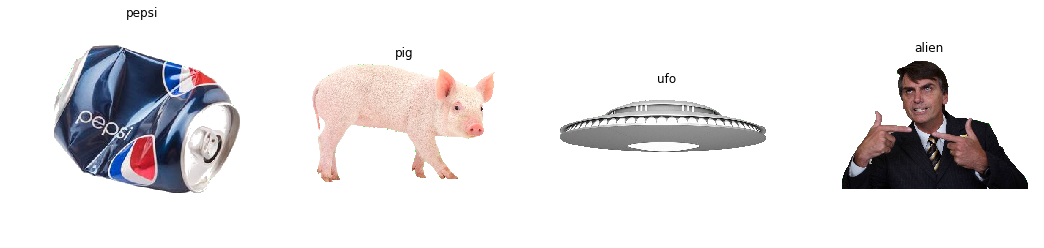

In [2]:
import numpy.ma as ma

def color_to_transparency(image, color, tolerance=0.25):
    '''
    Substitui uma cor da imagem RGBA por transparência.
    É utilizada uma tolerência de 25% em cada canal por padrão.
    '''
    masked_image = image.copy()
  
    reds = masked_image[:, :, 0]
    greens = masked_image[:, :, 1]
    blues = masked_image[:, :, 2]
    
    masked_reds = ma.masked_values(reds, color[0], atol=tolerance)
    masked_greens = ma.masked_values(greens, color[1], atol=tolerance)
    masked_blues = ma.masked_values(blues, color[2], atol=tolerance)
    masked_image[masked_reds.mask & masked_greens.mask & masked_blues.mask] = 0
    
    return masked_image



# tira o fundo das imagens
pepsi = color_to_transparency(pepsi, [0, 1, 0])
pig = color_to_transparency(pig, [0, 1, 0])
ufo = color_to_transparency(ufo, [0, 1, 0], tolerance=0.4)
alien = color_to_transparency(alien, [0, 1, 0])


# mostra o resultado
display_images([
    ('pepsi', pepsi),
    ('pig', pig),
    ('ufo', ufo),
    ('alien', alien)
], 1, 4)

## A pepsi

A imagem da pepsi tem transformações de **(a)** dessaturação, **(b)** borragem gaussiana e **(c)** sombreamento.

A mudança na **(a)** saturação (`desaturate(image, factor)`) é feita alterando o espaço de cores RGBA para RGB e, então, para HSV. Nesse espaço, o valor da saturação é multiplicado por um `factor` e, a imagem é convertida de volta para RGB e depois para RGBA.

A **(b)** borragem gaussiana (`blur(image, amount=1)` foi feita por meio do filtro gaussiano da biblioteca scikit-image e tem sua intensidade controlada por meio de `amount`.

O **(c)** sombreamento (`shade(image)`) foi feito para tentar simular os efeitos da iluminação natural da cena nos objetos que foram artificialmente colocados. Como a luz na cena vem da direita, a função cria um gradiente horizontal que começa preto e termina preto transparente. Esse gradiente é, então, usado para escurecer a imagem (onde ele está opaco) ou não fazer nada (onde está transparente).

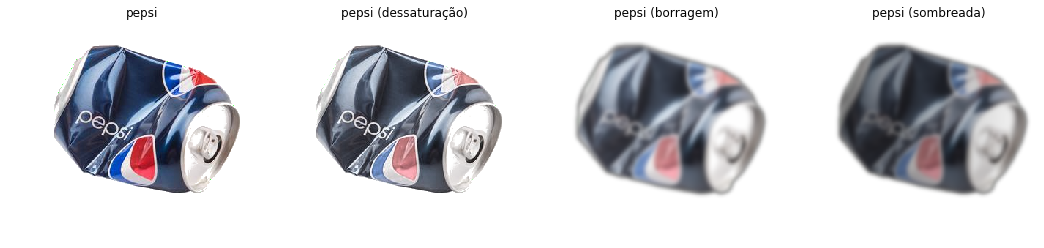

In [3]:
from skimage.filters import gaussian
from skimage import color

np.seterr(divide='ignore', invalid='ignore')

def desaturate(image, factor):
    '''
    Multiplica a saturação da imagem por um `factor`
    '''
    only_rgb = image[:, :, :3]
    only_alpha = image[:, :, 3]
    
    # faz a dessaturação
    to_hsv = color.rgb2hsv(only_rgb)
    to_hsv[:, :, 1] *= factor

    # converte de volta para rgb, depois rgba
    only_rgb = color.hsv2rgb(to_hsv)
    back_to_rgba = np.dstack((only_rgb, np.zeros((image.shape[0], image.shape[1], 1))))
    empty_alpha = np.dstack((np.zeros((image.shape[0], image.shape[1], 3)), only_alpha))
    desaturated_image = empty_alpha + back_to_rgba
    return desaturated_image

    
def blur(image, amount=1):
    '''
    Aplica filtro de borragem gaussiana
    '''
    return gaussian(image, sigma=amount, multichannel=True)


def shade(image):
    '''
    Cria um gradiente com o mesmo shape da imagem e ele é usado para escurecê-la
    O gradiente começa preto e termina transparente
    '''
    x = np.linspace([0, 0, 0, 1], [0, 0, 0, 0], image.shape[1])
    gradient = np.tile(x, (image.shape[0], 1, 1))
    shaded = image.copy()

    only_rgb = shaded[..., :3]
    only_alpha = shaded[..., 3]
    
    to_hsv = color.rgb2hsv(only_rgb)
    to_hsv[:, :, 2] *= (1 - gradient[:, :, 3] * 0.5)

    only_rgb = color.hsv2rgb(to_hsv)
    back_to_rgba = np.dstack((only_rgb, np.zeros((shaded.shape[0], shaded.shape[1], 1))))
    empty_alpha = np.dstack((np.zeros((shaded.shape[0], shaded.shape[1], 3)), only_alpha))
    return np.clip(empty_alpha + back_to_rgba, 0, 1)


pepsi_desaturated = desaturate(pepsi, 0.45)
pepsi_blurred = blur(pepsi_desaturated, 3)
pepsi_shaded = shade(pepsi_blurred)

display_images([
    ('pepsi', pepsi),
    ('pepsi (dessaturação)', pepsi_desaturated),
    ('pepsi (borragem)', pepsi_blurred),
    ('pepsi (sombreada)', pepsi_shaded)
], 1, 4)


pepsi_final = pepsi_shaded

## O porco

O porquíneo foi transformado com (a) superssaturação, (b) detecção de bordas, (c) modificação de cores, (d) dilatação morfológica, (e) rotação e (f) borragem gaussiana não-uniforme.

A (a) superssaturação foi feita para realçar as cores do porco, porque ele aparece bem pequeno na imagem final. Foi usada a função `desaturate(image, factor)`, mas com um `factor` maior que 1 - aumentando a saturação do suíno.

Para fazer um "efeito neon", provocado pela abdução que o UFO está fazendo na peppa pig, foi usada a (b) detecção de bordas com filtro Prewitt (`edges(image)`). As bordas, bem finas, foram alargados com (d) dilatação morfológica e teve suas (c) cores ajustadas para ficar parecidas com as cores do raio trator.

Por fim, o poico foi (e) rotacionado para sua orientação final e então ele sofreu (f) borragem gaussiana não-uniforme para simular efeito de borragem de movimento no eixo y, visto que ele está sendo tragado pelo raio trator para o UFO. A mesma função de borragem `blur(image, amount)` foi usada, porém com valores diferentes de `amount` para os eixos Y (valor alto) e X (valor baixo).



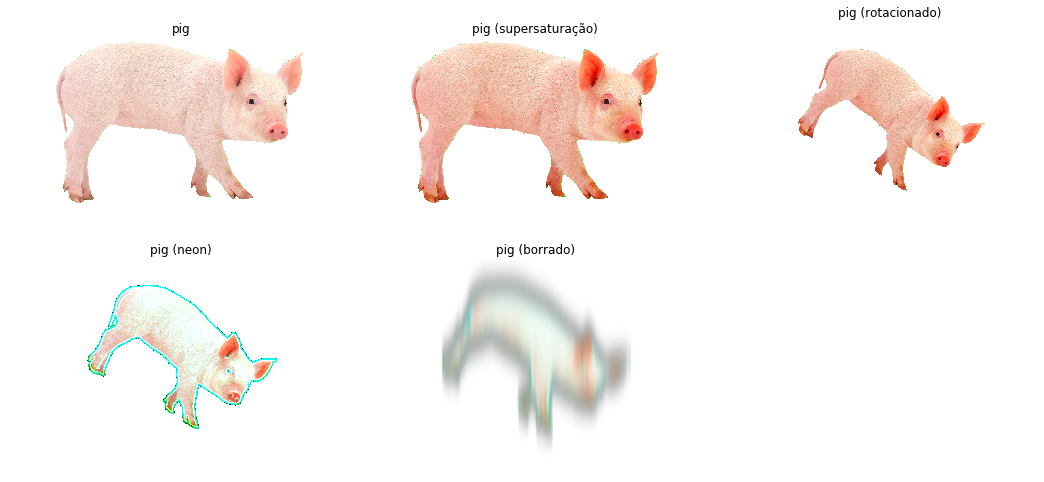

In [4]:
from skimage.filters import gaussian, prewitt
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import disk
from skimage.transform import rotate


@adapt_rgb(each_channel)
def edges(image):
    '''
    Detecta bordas (com prewitt) e as retorna bem alargadas (com dilatação)
    '''
    edges_only = prewitt(image)
    return np.clip(dilation(edges_only, disk(10)), 0, 1)


def rotate_image(image, orientation):
    '''
    Rotaciona a imagem no próprio centro uma certa quantidade de graus
    '''
    center = np.floor(np.array(image.shape[:2]) / 2)
    return rotate(image, orientation, resize=True, center=center)


pig_desaturated = np.clip(desaturate(pig, 1.75), 0, 1)
pig_rotated = rotate_image(pig_desaturated, -30)
pig_neon = np.clip((edges(pig_rotated) * [0, 2, 2, 100]) + pig_rotated, 0, 1)
pig_blurred = np.clip(blur(pig_neon, [100, 1]), 0, 1)


display_images([
    ('pig', pig),
    ('pig (supersaturação)', pig_desaturated),
    ('pig (rotacionado)', pig_rotated),
    ('pig (neon)', pig_neon),
    ('pig (borrado)', pig_blurred)
], 2, 3)


pig_final = pig_blurred

## O UFO

O UFO sofreu **(a)** borragem gaussiana e **(b)** sombreamento (para simular a iluminação da cena).


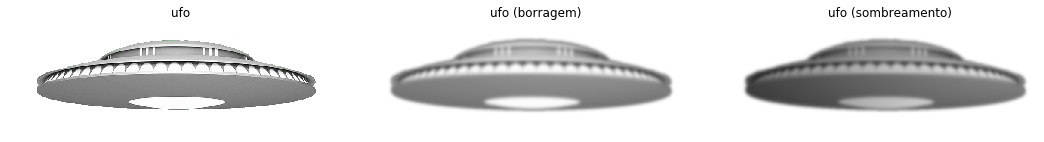

In [5]:
ufo_blurred = np.clip(blur(ufo, 4), 0, 1)
ufo_shaded = np.clip(shade(ufo_blurred), 0, 1)

display_images([
    ('ufo', ufo),
    ('ufo (borragem)', ufo_blurred),
    ('ufo (sombreamento)', ufo_shaded)
], 1, 3)


ufo_final = ufo_shaded

## O Raio Trator

O raio trator foi gerado proceduralmente como um gradiente horizontal definido por seus _color stops_: uma cor e uma porcentagem da largura da imagem onde essa cor estará com intensidade total.

A função `generate_tractor_beam(size, color_stops):` **(a)** gera o gradiente com tamanho `size` e as cores definidas pelos `color_stops` e, além disso, **(b)** "abaula" a imagem resultante.

A **(a)** interpolação gaussiana (ver funções `gaussian(x,a,b,c,d)`) usada para o gradiente segue a fórmula:

\begin{equation}
c(x) = \sum_{n=0}^{len(colors\_stops)}{color\_stops_n.cor \times {e^{ \frac{-(x-color\_stops_n.posicao \times largura\_total)²}{2(largura\_total \div len(color\_stops))^2} }}}
\end{equation}

...onde $x$ é a posição do pixel do gradiente, $largura\_total$ é a largura do gradiente sendo gerado e $color\_stops$ é um vetor em que cada posição possui uma `cor` e uma `posicao`, esta como uma porcentagem da $largura\_total$.

Para **(b)** abaular a imagem com o gradiente, foi usada uma função `bulge_down(image, radius, distance)` que torna transparente os pixels **(b.1)** dentro de um círculo de raio `radius` a uma distância de `distance` pixels do topo da imagem e também os pixels **(b.2)** abaixo e fora de um círculo com mesmo raio e distância da parte de baixo da imagem.

![](docs/bulging.png)

Para verificar se um pixel estava dentro do círculo foi gerada uma matriz com as coordenadas dos pixels que foi usada para verificar a distância euclidiana do pixel até o centro do círculo: se a distância é maior que o raio, o pixel não está dentro do círculo.


Após sua criação e abaulamento, o raio trator foi deformado (_warped_) para que ficasse maior na parte de baixo do que em cima. Isso foi feito (`oblong_down(image, percentage`) por meio da determinação da inversa de uma transformação que levaria os quatro cantos da imagem a outros quatro pontos em que os dois de cima estão mais próximos entre si que os de baixo. Uma vez encontrada a transformação projetiva que faria essa operação, sua inversa foi aplicada na imagem.

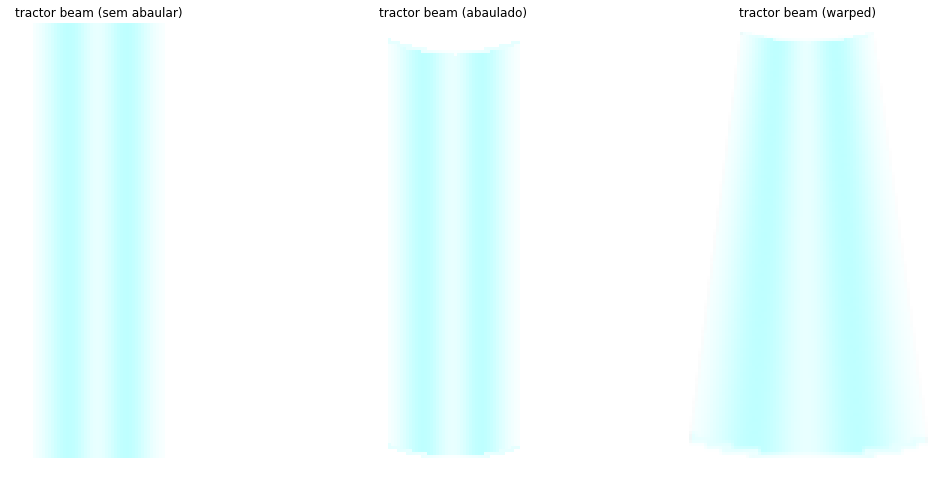

In [6]:
from skimage import transform as tf


def oblong_down(image, percentage=0.8):
    # dado em (x,y) - não em (i,j)
    src = np.array([
        [0, 0],
        [0, image.shape[0]-1],
        [image.shape[1]-1, image.shape[0]-1],
        [image.shape[1]-1, 0]
    ])
    dst = np.array([
        [0, 0],
        [-image.shape[1]*percentage, image.shape[0]-1],
        [image.shape[1]*(1 + percentage), image.shape[0]-1],
        [image.shape[1]-1, 0]
    ])

    new_shape = (
        image.shape[0],
        np.ceil(image.shape[1] * (1 + percentage * 2)).astype(int),
        image.shape[2]
    )

    # desloca para a direita para não ter coordenadas negativas de pixels
    offset = tf.SimilarityTransform(translation=(image.shape[1]*percentage, 0))
    # acha a projeção que leva de dst para src
    transform = tf.ProjectiveTransform()
    transform.estimate(src, dst)
    # transformação resultante
    resulting = transform + offset
    # warping de src para dst (inversa da resultante)
    warped = tf.warp(image, resulting.inverse, output_shape=new_shape)
    
    return warped



tractor_beam_no_bulge = generate_tractor_beam((146,44), [
    (0.0,    [0, 1, 0.931, 0]),          # azul transparente
    (0.2,    [0, 1, 0.931, 0]),          # azul transparente
    (0.3001, [0, 1, 0.917, 0.25]),       # azul ciano forte
    (0.5,    [0.812, 1, 0.981, 0.275]),  # quase branco
    (0.6999, [0, 1, 0.917, 0.25]),
    (0.7,    [0, 1, 0.931, 0]),
    (1.0,    [0, 1, 0.931, 0])
], bulged=False)
tractor_beam_warped = oblong_down(tractor_beam, percentage=0.4)



display_images([
    ('tractor beam (sem abaular)', tractor_beam_no_bulge),
    ('tractor beam (abaulado)', tractor_beam),
    ('tractor beam (warped)', tractor_beam_warped)
], 1, 3)


tractor_beam_final = tractor_beam_warped

## O ~~Satanás~~Alien

O alien foi quem deu mais trabalho (claro!) e sofreu as transformações de **(a)** reflexão pelo eixo y, **(b)** deformação via malha poligonal, **(c)** superssaturação, recoloração (matiz, luminosidade) e transparência e **(d)** borragem gaussiana.

A **(a)** reflexão pelo eixo y poderia ser feita como uma transformação de escala com valor negativo, mas a inversão foi feita no próprio `ndarray`: `image = image[:, ::-1, ...]`.

Para fazer a **(b)** deformação necessária para o alien aparecer no capacete do astronauta, foi necessário criar uma malha poligonal de origem em cima da imagem original e, então, uma malha poligonal de destino, com a deformação desejada. Depois que os vértices da malha foram definidos, foram determinadas as transformações afim de cada triângulo para levá-los de malha original para a desejada e, então, a imagem teve suas coordenadas multiplicadas pelas inversas dessas transformações. As malhas de origem (esquerda) e destino (direita) foram:

![](docs/malha.png)

A **(c)** coloração da imagem foi alterada para casar bem com a cor das outras coisas refletidas pelo capacete do astronauta, e foi aplicada também um pouco de **(d)** borragem gaussiana para remover detalhes da imagem e suavizá-la.

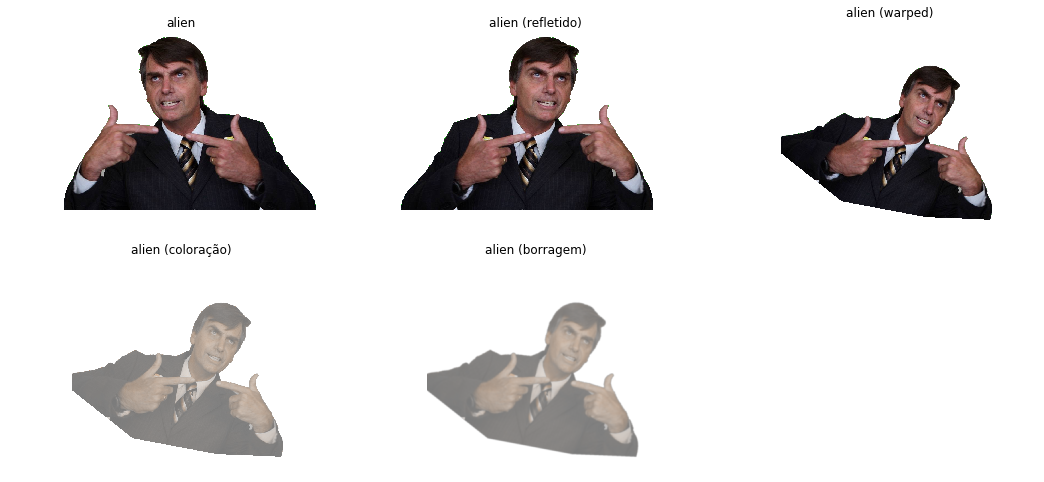

In [7]:
def salnoraborize(image):
    # flipa a imagem horizontalment
    image = image.copy()
    image = image[:, ::-1,...]
    width = image.shape[1]
    height = image.shape[0]

    # dado em (x,y) - não em (i,j)
    src = np.array([
        [0, height-1],
        [np.floor(width * 0.33), height-1],
        [np.floor(width * 0.67), height-1],
        [width-1, height-1],
        [np.floor(0.8 * width), 0],
        [np.floor(0.2 * width), 0]
    ])

    new_width = np.ceil(width * 1.10)
    new_height = np.ceil(height * 1.67)
    dst = np.array([
        [-width*0.1, np.floor(new_height * 0.58)],
        [np.floor(new_width * 0.280), np.floor(0.90 * new_height)],
        [np.floor(new_width * 0.667), np.floor(0.98 * new_height)],
        [new_width * 1.1, new_height-1],
        [np.floor(1.00 * new_width), np.floor(0.30 * new_height)],
        [np.floor(0.40 * new_width), 0.08 * new_height]
    ])
    new_shape = (new_height, new_width, image.shape[2])

    # acha a projeção que leva de dst para src
    transform = tf.PiecewiseAffineTransform()
    transform.estimate(src, dst)
    
    # warping de src para dst (inversa da resultante)
    warped = tf.warp(image, transform.inverse, output_shape=new_shape)
    
    # acha os triângulos que foram usados para fazer
    # a operação de transformação (pode ser usado para debugging)
    triangles_vertices = transform._tesselation.vertices
    triangles_dst = []
    triangles_src = []
    for tri in triangles_vertices:
        triangles_src.append(src[tri, :])
        triangles_dst.append(dst[tri, :])
    
    return warped, (triangles_src, triangles_dst)



def tint(image, hue, lightness):
    '''
    Define a matiz da imagem como `hue` e multiplica a claridade por `lightness`
    '''
    only_rgb = image[..., :3]
    only_alpha = image[..., 3]
    
    to_hsv = color.rgb2hsv(only_rgb)
    to_hsv[:, :, 0] = hue
    to_hsv[:, :, 2] *= lightness

    only_rgb = color.hsv2rgb(to_hsv)
    back_to_rgba = np.dstack((only_rgb, np.zeros((image.shape[0], image.shape[1], 1))))
    empty_alpha = np.dstack((np.zeros((image.shape[0], image.shape[1], 3)), only_alpha))
    tinted_image = empty_alpha + back_to_rgba
    
    return tinted_image

def alpha(image, factor):
    '''
    Multiplica o valor de alpha da imagem por `factor`
    '''
    return image * [1, 1, 1, factor]



alien_flipped = alien.copy()[:, ::-1,...]
alien_warped, alien_triangles = salnoraborize(alien)
alien_desaturated = np.clip(desaturate(alien_warped, 1.25), 0, 1)
alien_tinted = tint(alien_desaturated, 0.075, 0.8)
alien_alpha = alpha(alien_tinted, 0.52)
alien_blurred = blur(alien_alpha, 3)


display_images([
    ('alien', alien),
    ('alien (refletido)', alien_flipped),
    ('alien (warped)', alien_warped),
    ('alien (coloração)', alien_alpha),
    ('alien (borragem)', alien_blurred)
], 2, 3)


alien_final = alien_blurred

## Projeção de sombra

O único objeto da cena que teria sua sombra visível na fotografia (devido à direção da iluminação e da posição dos objetos) seria o porco.

Foi criada uma sombra para ele, usando a sua própria imagem, porém sem nenhuma saturação, rotacionada e devidamente posicionada, com bastante borragem gaussiana.

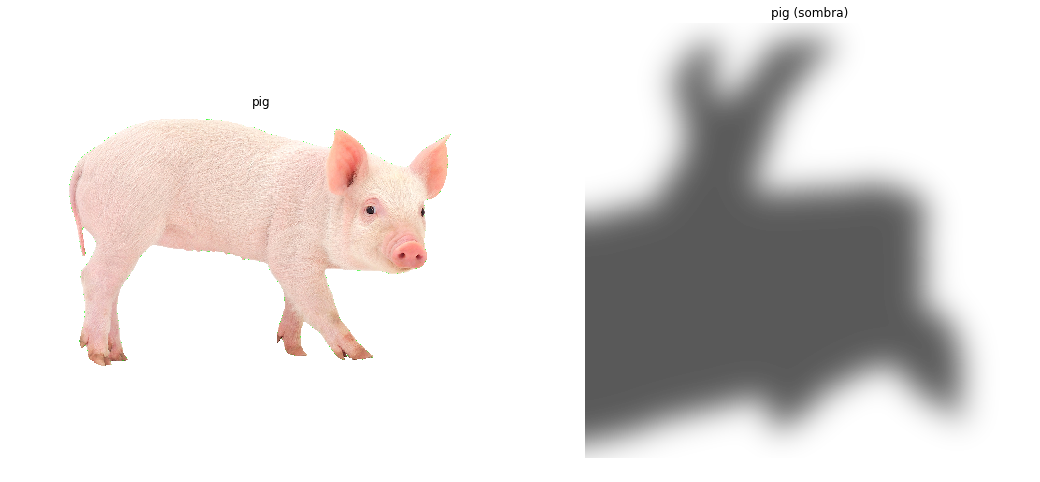

In [8]:
pig_shadow = pig_desaturated.copy()
pig_shadow = pig_shadow[::-1]
pig_shadow = desaturate(pig_shadow, 0)
pig_shadow = tint(pig_shadow, 0, 0)
pig_shadow = alpha(pig_shadow, 0.65)
pig_shadow = pig_shadow[:, np.floor(pig_shadow.shape[1]*0.42).astype('int'):pig_shadow.shape[1]-1, ...]
pig_shadow = blur(pig_shadow, 32)

display_images([
    ('pig', pig),
    ('pig (sombra)', pig_shadow)
], 1, 2)

# Resultado final


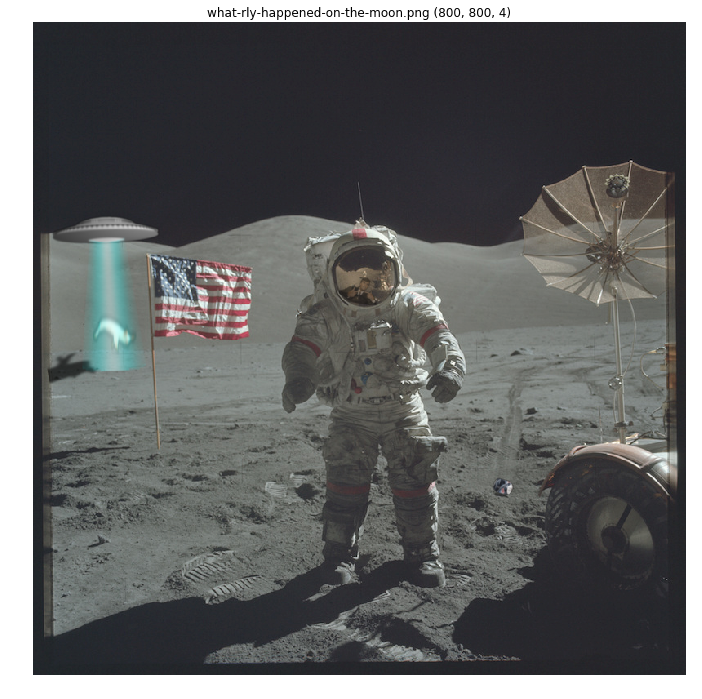

In [9]:
from skimage.transform import resize

def merge_images(background, image, position=(0,0), scale=(1,1), orientation=0):
    # pega as dimensões da imagem de fundo e da que será colada
    background_height, background_width, channels = background.shape
    image_height, image_width = np.floor(np.array(image.shape[:2]) * np.array(scale)).astype(int)
    
    # redimensiona a imagem para seu devido lugar
    image_transformed = resize(image.copy(), (image_height, image_width), mode='constant', order=5, anti_aliasing=True, anti_aliasing_sigma=None, clip=True)
    
    # rotaciona a imagem no eixo z (caso haja uma rotação)
    if orientation != 0:
        orientation_in_radians = np.radians(orientation)
        center = np.floor(np.array(image_transformed.shape[:2]) / 2)
        image_transformed = rotate(image_transformed, orientation, resize=True, center=center)
        image_height, image_width = image_transformed.shape[:2]

    # cria uma imagem do tamanho do background, mas com 0s
    new_image = np.zeros((background_height, background_width, channels))
    # cola a imagem no lugar
    y = position[0]
    x = position[1]
    new_image[y : y+image_height, x : x+image_width, :] = image_transformed
    
    # cria máscara
    mask = np.stack([new_image[:, :, 3] for _ in range(4)], axis=2)
    inv_mask = 1 - mask
    
    # mesclagem final
    merged_image = background[:, :, :] * inv_mask + new_image * mask
    merged_image[:, :, 3] = 1
    return np.clip(merged_image, 0, 1)


def display(title, image):
    size = (18,12)
    figure, axes = plt.subplots(num=1, figsize=size)
    axes.axis('off')
    axes.set_title('{} {}'.format(title, image.shape))
    axes.imshow(image)
    plt.show()

merged = merge_images(moon, pepsi_final, (556,561), (0.1, 0.1))
merged = merge_images(merged, ufo_final, (228,22), (0.2, 0.2), 2)
merged = merge_images(merged, pig_final, (356,68), (0.035, 0.035), 0)
merged = merge_images(merged, pig_shadow, (399, 15), (0.037, 0.075), 10)
merged = merge_images(merged, tractor_beam_final, (260, 51), (1.15, 1), 3)
merged = merge_images(merged, alien_final, (304,375), (0.04, 0.04))
display('what-rly-happened-on-the-moon.png', merged)


from skimage import io, exposure, img_as_ubyte
import warnings

# converte a imagem para 1 byte/componente
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    final = exposure.rescale_intensity(merged, out_range='float')
    final = skimage.img_as_ubyte(final)
    
# salva a imagem final
io.imsave('what-rly-happened-on-the-moon.png', final)